# ANU ASTR4004 2024 - Week 8 (24+26 September 2024)

Author: Dr Sven Buder (sven.buder@anu.edu.au)

based on Viviana Acquaviva's notebooks and the scikit learn tutorial:  
https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html#sdss-spectral-data


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dimensionality-reduction-of-galaxy-spectra" data-toc-modified-id="Dimensionality-reduction-of-galaxy-spectra-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dimensionality reduction of galaxy spectra</a></span><ul class="toc-item"><li><span><a href="#The-data:-4000-spectra,-1000-features" data-toc-modified-id="The-data:-4000-spectra,-1000-features-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The data: 4000 spectra, 1000 features</a></span></li><li><span><a href="#Let's-throw-a-PCA-onto-it" data-toc-modified-id="Let's-throw-a-PCA-onto-it-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Let's throw a PCA onto it</a></span></li></ul></li></ul></div>

In [1]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import patches

# Make the size and fonts larger for this presentation
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 12

In [2]:
from sklearn import preprocessing, decomposition
import skimage
from skimage.transform import resize, rescale
from skimage import io

## Dimensionality reduction of galaxy spectra

### The data: 4000 spectra, 1000 features

In [4]:
data = np.load('data/spec4000_corrected.npz')

In [5]:
wavelengths = data['wavelengths']
X = data['X']
y = data['y']
labels = data['labels'].astype('str')

In [6]:
X.shape

(4000, 1000)

In [7]:
y

array([4, 3, 3, ..., 4, 2, 4], dtype=int32)

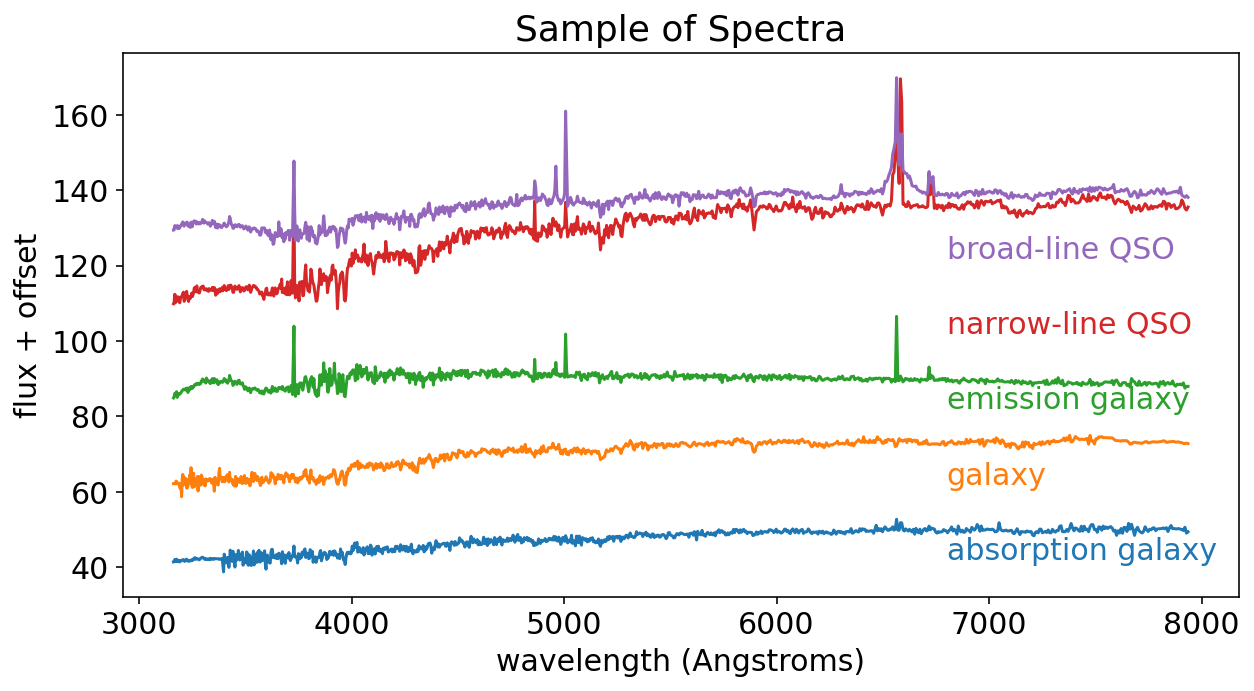

In [9]:
# Let's plot a few spectra
plt.figure(figsize=(10,5))

for i_class in (2, 3, 4, 5, 6):
    i = np.where(y == i_class)[0][0]
    l = plt.plot(wavelengths, X[i] + 20 * i_class)
    c = l[0].get_color()
    plt.text(6800, 2 + 20 * i_class, labels[i_class], color=c)

plt.subplots_adjust(hspace=0)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('flux + offset')
plt.title('Sample of Spectra');

### Let's throw a PCA onto it

In [10]:
#  Perform PCA

scaler = preprocessing.StandardScaler() #It's important that data are centered!

Xn = scaler.fit_transform(X) #This is a standardization procedure.

pca_50 = decomposition.PCA(n_components=50, random_state=0)

pca_100 = decomposition.PCA(n_components=100, random_state=0)

pca_1000 = decomposition.PCA(n_components=1000, random_state=0)

X_proj_50 = pca_50.fit_transform(Xn) #the projected data set - it lives in a new feature space with 4,000 objects and 50 features

X_proj_100 = pca_100.fit_transform(Xn) #the projected data set - it lives in a new feature space with 4,000 objects and 100 features

X_proj_1000 = pca_1000.fit_transform(Xn) #the projected data set - it lives in a new feature space with 4,000 objects and 1000 features

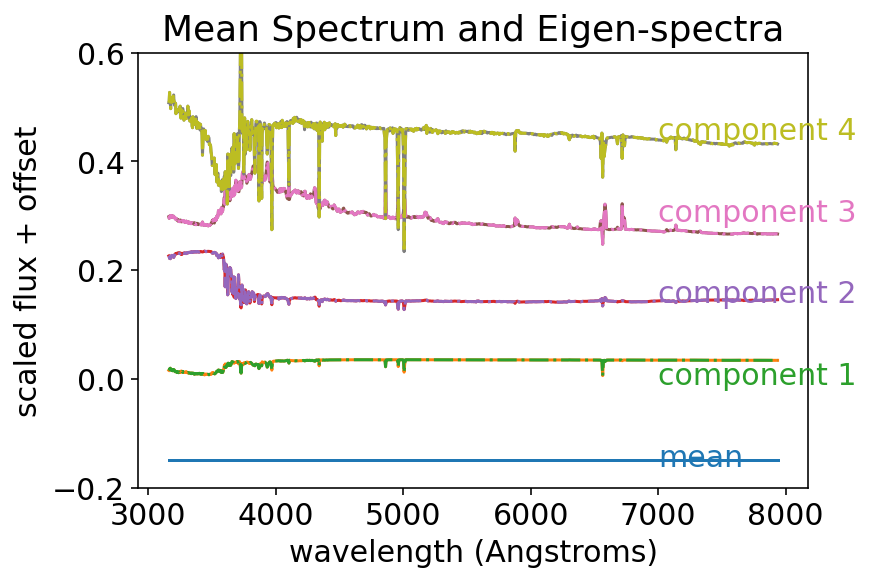

In [13]:
plt.figure()

l = plt.plot(wavelengths, pca_50.mean_ - 0.15)
c = l[0].get_color()
plt.text(7000, -0.16, "mean", color=c) 

# In linear PCA, the first eigenvector is always the mean, 
# and the first n components are always the same

for i in range(4):
    
    l = plt.plot(wavelengths, pca_50.components_[i] + 0.15 * i)
    
    l = plt.plot(wavelengths, pca_100.components_[i] + 0.15 * i, linestyle = '-.')
    
    c = l[0].get_color()
    
    plt.text(7000, -0.01 + 0.15 * i, "component %i" % (i + 1), color=c)

    plt.ylim(-0.2, 0.6)
    
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux + offset')
plt.title('Mean Spectrum and Eigen-spectra')

plt.show()

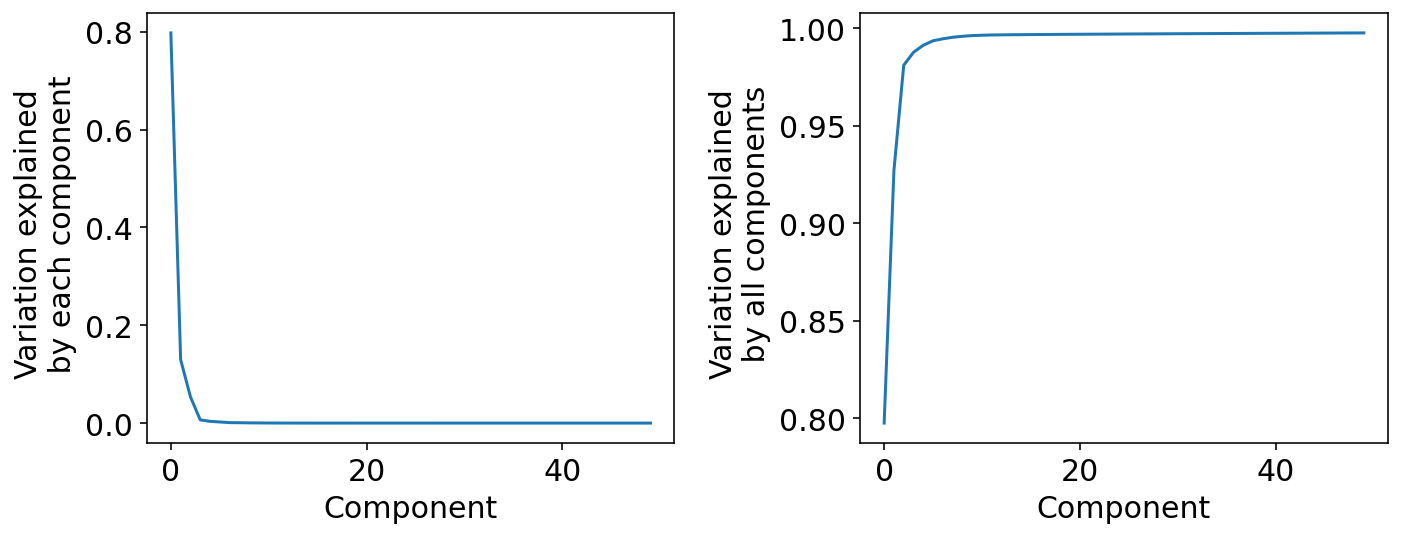

In [22]:
f, gs = plt.subplots(1,2,figsize=(10,4))

gs[0].plot(pca_50.explained_variance_ratio_)
gs[0].set_ylabel('Variation explained \n by each component')
gs[0].set_xlabel('Component')

gs[1].plot(np.cumsum(pca_50.explained_variance_ratio_))
gs[1].set_ylabel('Variation explained \n by all components')
gs[1].set_xlabel('Component')

plt.tight_layout()